In [20]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [21]:
dataset = load_boston()

In [22]:
df = pd.DataFrame(
    dataset.data,
    columns=dataset.feature_names
)

df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


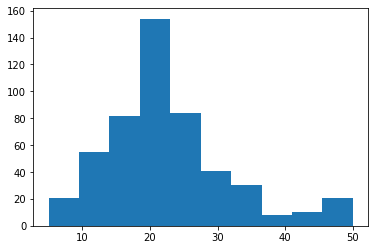

In [23]:
_ = plt.hist(dataset.target)

In [24]:
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42
)

In [25]:
knn = KNeighborsRegressor(
    n_neighbors=5
)

knn.fit(X_train, y_train)

y_preds = knn.predict(X_test)

mean_absolute_error(y_test, y_preds)

4.231231527093596

In [26]:
# sera q o resultado esta bom?

(array([123.,  60.,  10.,   6.,   1.,   1.,   0.,   0.,   0.,   2.]),
 array([9.80392157e-04, 2.01739496e-01, 4.02498599e-01, 6.03257703e-01,
        8.04016807e-01, 1.00477591e+00, 1.20553501e+00, 1.40629412e+00,
        1.60705322e+00, 1.80781232e+00, 2.00857143e+00]),
 <a list of 10 Patch objects>)

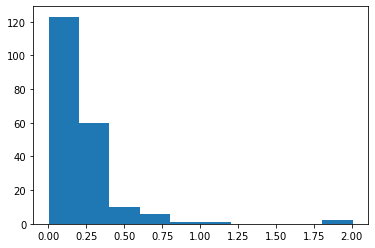

In [27]:
ratio_diff = np.abs(y_preds - y_test) / y_test

plt.hist(ratio_diff)

In [28]:
(ratio_diff > 0.1).mean(), (ratio_diff > 0.2).mean(), (ratio_diff > 0.3).mean()

(0.6502463054187192, 0.39408866995073893, 0.22167487684729065)

In [29]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
knn = KNeighborsRegressor(
    n_neighbors=5
)

knn.fit(X_train, y_train)

y_preds = knn.predict(X_test)

mean_absolute_error(y_test, y_preds)

3.1144827586206896

(array([111.,  55.,  19.,   5.,   5.,   1.,   0.,   3.,   3.,   1.]),
 array([9.43396226e-04, 1.12049057e-01, 2.23154717e-01, 3.34260377e-01,
        4.45366038e-01, 5.56471698e-01, 6.67577358e-01, 7.78683019e-01,
        8.89788679e-01, 1.00089434e+00, 1.11200000e+00]),
 <a list of 10 Patch objects>)

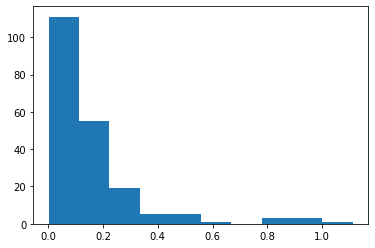

In [31]:
ratio_diff = np.abs(y_preds - y_test) / y_test

plt.hist(ratio_diff)

In [32]:
(ratio_diff > 0.1).mean(), (ratio_diff > 0.2).mean(), (ratio_diff > 0.3).mean()

(0.46798029556650245, 0.22660098522167488, 0.09359605911330049)